# Introdução a Redes Neurais Artificiais

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.datasets import mnist


2022-09-08 22:20:26.883341: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-08 22:20:34.840079: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-08 22:20:34.840144: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-08 22:20:36.028354: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-08 22:20:47.418886: W tensorflow/stream_executor/platform/de

In [4]:
# Carregando o dataset que vai ser utilizado para treinar e testar a rede

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
# Nomeando as classes que serão avaliadas 

class_names = ['Zero', 'One', 'Two','Three','Four','Five','Six','Seven','Eight','Nine']

In [6]:
# Publica informações sobre as imagens de treino.

print(train_images.shape)

(60000, 28, 28)


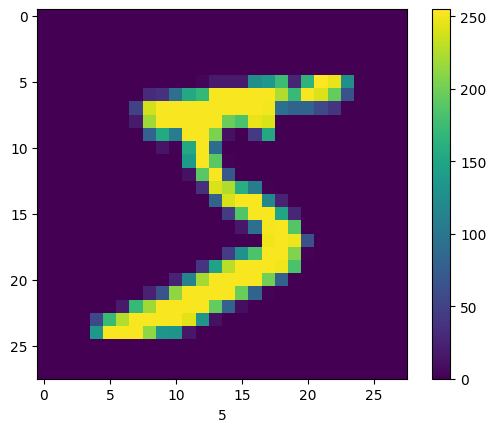

In [7]:
# Basicamente mostra visualmente o primeiro item do treino com o matplotlib

plt.figure()
plt.imshow(train_images[0])
plt.xlabel(train_labels[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# Normalizando as imagens para ficar entre 0 e 1, para obter melhores resultados.

train_images = train_images / 255.0
test_images = test_images / 255.0

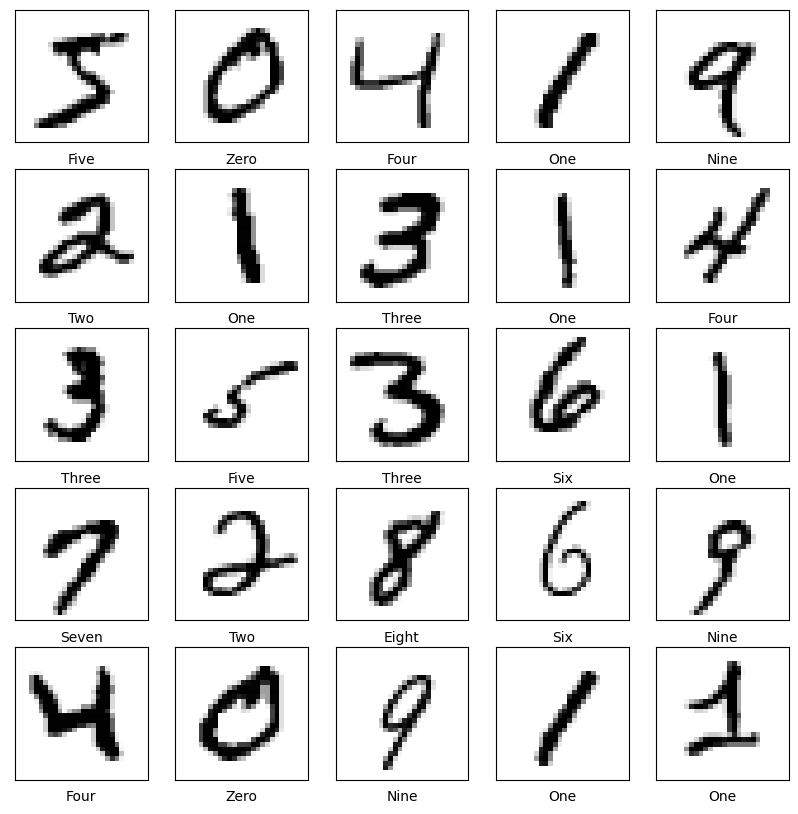

In [9]:
# Mostrando os 25 primeiros itens do conjunto de treino

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()    

In [10]:
model = keras.Sequential([
   keras.layers.Flatten(input_shape=(28,28)),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(10, activation='softmax')
])

2022-09-08 22:21:04.963466: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-08 22:21:04.981920: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-08 22:21:04.982090: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (wagnerjunior): /proc/driver/nvidia/version does not exist
2022-09-08 22:21:05.066070: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [12]:
model.fit(
    train_images,
    keras.utils.to_categorical(train_labels),
    epochs=10,
    batch_size=128,
)

2022-09-08 22:21:08.499042: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
469/469 [==============================] - 6s 4ms/step - loss: 0.3553 - accuracy: 0.9007
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1659 - accuracy: 0.9526
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1187 - accuracy: 0.9656
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0928 - accuracy: 0.9733
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0744 - accuracy: 0.9786
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0621 - accuracy: 0.9825
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0516 - accuracy: 0.9851
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0433 - accuracy: 0.9878
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0372 - accuracy: 0.9895
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0313 - accuracy: 0.9914

In [14]:
test_loss, test_acc = model.evaluate(test_images, keras.utils.to_categorical(test_labels), verbose=2)

print('\nTest accuracy:', test_acc)

2022-09-08 22:25:45.096982: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 - 1s - loss: 0.0801 - accuracy: 0.9758 - 1s/epoch - 4ms/step

Test accuracy: 0.9757999777793884


In [15]:
predictions = model.predict(test_images)

2022-09-08 22:26:17.239686: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step


In [16]:
predictions[0]

array([5.8984810e-08, 6.2050326e-10, 6.1265987e-06, 6.4358392e-05,
       2.6480387e-10, 2.3546461e-08, 3.1326413e-12, 9.9992627e-01,
       5.2721606e-07, 2.5372101e-06], dtype=float32)

In [17]:
np.argmax(predictions[0])

7

In [18]:
test_labels[0]

7

In [19]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}%({})".format(class_names[predicted_label], 
                                        100*np.max(predictions_array), 
                                        class_names[true_label]),
                                        color=color)  

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

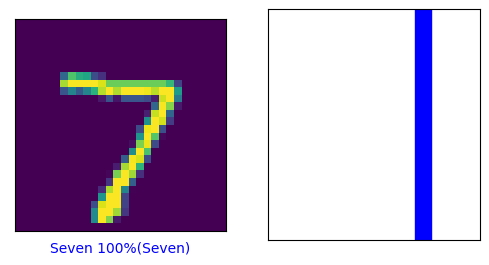

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

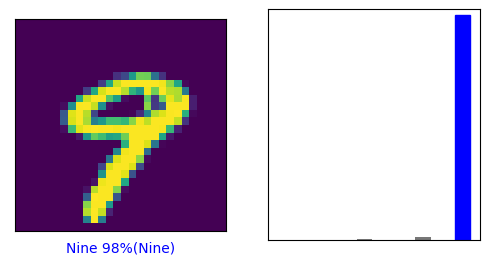

In [21]:
i = 9
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

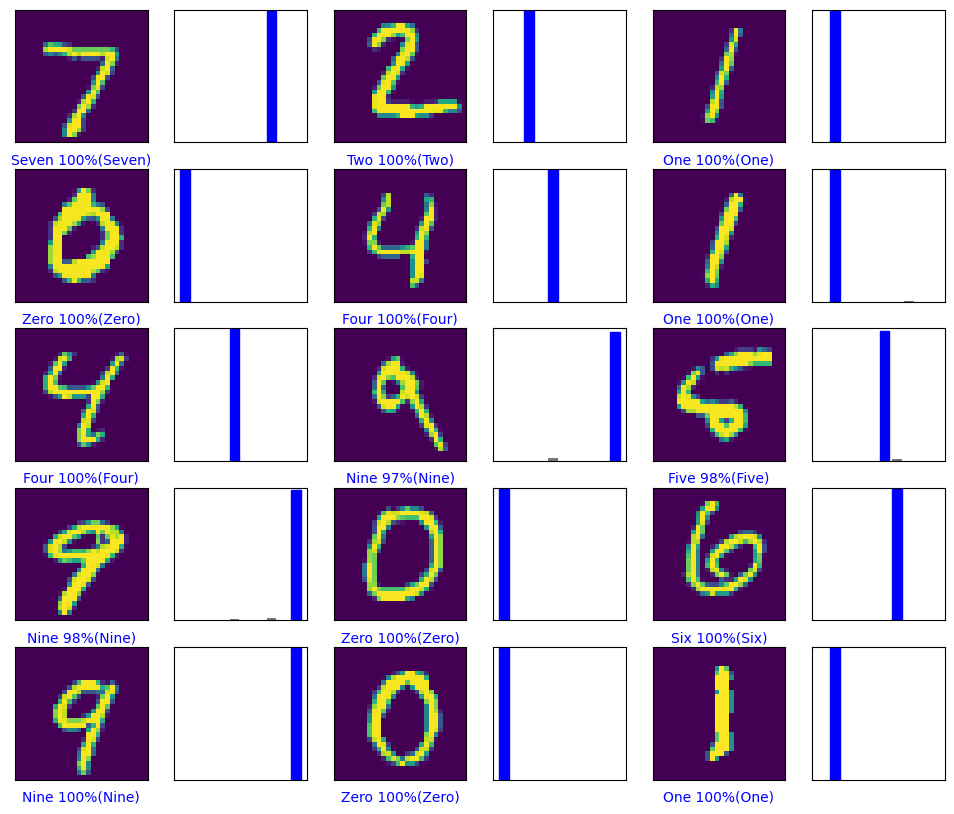

In [22]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()    